# Week 04 "Pre-lecture" HW

### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The difference between the SEM and the SD of the original data is that SD measures how spread out individual data points are in your dataset, while SEM tells you how much the sample mean would vary if you took multiple samples. SEM gives a sense of how precise your sample mean is as an estimate of the true population mean.

SD captures the variability within the original dataset. SEM captures the variability of sample means and reflects how accurate your sample mean is at estimating the population mean.

---
### Summaries of my ChatBot session (Q#1) (01)
**Link to the this chat log history for "Pre-lecture" HW:** https://chatgpt.com/share/66fa37d4-6b28-8011-a1cd-1b2cb5ef14c9

1. **Standard Error of the Mean vs. Standard Deviation**: We discussed how the **standard deviation (SD)** measures the variability within the data points of a sample, while the **standard error of the mean (SEM)** measures how much the sample mean is expected to vary if you took multiple samples. SEM reflects the precision of the sample mean as an estimate of the population mean.

2. **Small SD but Large SEM**: We explored how it’s unlikely but possible to have a small standard deviation and a large SEM when the sample size is extremely small. Since SEM is calculated as \( \frac{SD}{\sqrt{n}} \), a small \( n \) can cause SEM to be large even if SD is small.

3. **How Bootstrapping Helps Understand SEM**: Bootstrapping helps estimate SEM by simulating multiple resamples from the original dataset. These resamples generate a distribution of bootstrapped means, and the standard deviation of these means approximates the SEM. This method is valuable when you have limited data and want to avoid relying on strict parametric assumptions.

--- 
### 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

To use the "standard error of the mean" to create a 95% confidence interval:
- First, you need to calculate the sample mean from your bootstrapped samples.
- Then, you calculate the standard deviation of the sample means, which is the standard error of the mean. 
- After that, you multiply the standard error of the mean by 1.96. This is the Z-score you use for a 95% confidence interval. (The Z-score is just a number that tells you how many standard deviations a value is from the mean.)
- Finally, you add and subtract this value from the sample mean to get the range. This gives you the lower and upper bounds of your confidence interval, which should cover about 95% of the bootstrapped means.

---
### Summaries of my ChatBot session (Q#2) (02)
**Link to the this chat log history for "Pre-lecture" HW:** https://chatgpt.com/share/66fa3dd2-9074-8011-a7aa-c0cf4fdc1ec3

Here’s a summary of our exchanges related to bootstrapping, confidence intervals, and Z-scores:

1. **Confidence Interval Explanation**:
   - I explained that a confidence interval represents a range of values that is likely to contain the true population parameter with a certain level of confidence. For example, a 95% confidence interval means that if many samples were taken, 95% of the calculated intervals would contain the true mean.
   
2. **How to Use the Standard Error of the Mean (SE) to Create a 95% Confidence Interval**:
   - The standard error of the mean (SE) is calculated from bootstrapped samples by resampling and calculating the mean for each sample, then finding the standard deviation of these sample means.
   - The formula for a 95% confidence interval is:
     \[
     \text{CI} = \hat{\mu} \pm 1.96 \cdot SE
     \]
     where \(\hat{\mu}\) is the sample mean, and 1.96 is the Z-score for a 95% confidence level.
   - The interval is computed by adding and subtracting 1.96 times the SE from the sample mean.

3. **Explanation of the Z-score**:
   - The Z-score is a measure of how many standard deviations a data point is from the mean in a standard normal distribution.
   - Unlike a fixed constant like Pi, the Z-score varies depending on the confidence level. For example, a Z-score of 1.96 corresponds to a 95% confidence level, while a Z-score of 2.58 corresponds to a 99% confidence level.

---
### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

To create a 95% bootstrapped confidence interval using the bootstrapped means, you don't need to use the standard error. Instead, you can just find the range that covers 95% of those bootstrapped means. You do this by using np.quantile() on the bootstrapped means to get the 2.5th percentile and the 97.5th percentile. These two values give you the lower and upper bounds of the confidence interval, which will cover 95% of the bootstrapped means.

---
### 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [3]:
import numpy as np

sample = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
n_bootstraps = 10000
np.random.seed(42)

def bootstrap_confidence_interval(data, statistic, n_bootstraps, ci=95):
    """
    Compute a bootstrap confidence interval for the given statistic.
    
    Parameters:
    - data: array-like, the original sample
    - statistic: callable, a function to calculate the desired statistic (e.g., np.mean or np.median)
    - n_bootstraps: int, the number of bootstrap resamples
    - ci: float, the confidence interval level (default is 95 for a 95% CI)
    
    Returns:
    - Lower and upper bounds of the bootstrap confidence interval
    """
    
    bootstrapped_statistics = []
    for _ in range(n_bootstraps):
        resample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_statistics.append(statistic(resample))
    
    lower_bound = np.percentile(bootstrapped_statistics, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_statistics, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Change the variable "mean_ci" to "median_ci", and then change "np.mean" in the statistic parameter to "np.median".
mean_ci = bootstrap_confidence_interval(sample, np.mean, n_bootstraps)

# Change the "population mean" to "population median", and then change the "{mean_ci}" to "{median_ci}".
print(f"95% Bootstrap CI for the population mean: {mean_ci}")


95% Bootstrap CI for the population mean: (19.0, 36.5)


---
### Summaries of my ChatBot session (Q#4) (03)
**Link to the this chat log history for "Pre-lecture" HW:** https://chatgpt.com/share/66fa4824-8434-8011-ac05-c5b1df2f8946

**1. Bootstrapping Confidence Intervals for the Population Mean**

You asked for code to produce a 95% bootstrap confidence interval for the population mean, and I provided the following code:

```python
import numpy as np

# Example sample data
sample = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Number of bootstrap resamples
n_bootstraps = 10000

# Function to calculate the bootstrap confidence interval
def bootstrap_confidence_interval(data, statistic, n_bootstraps, ci=95):
    bootstrapped_statistics = []
    for _ in range(n_bootstraps):
        resample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_statistics.append(statistic(resample))
    
    lower_bound = np.percentile(bootstrapped_statistics, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_statistics, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Calculate 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_confidence_interval(sample, np.mean, n_bootstraps)
print(f"95% Bootstrap CI for the population mean: {mean_ci}")
```

**2. Changing the Statistic to Median**

You asked if, to calculate a 95% bootstrap confidence interval for the median, the only thing to change is the `statistic` parameter. I confirmed this and explained that by passing `np.median` to the `bootstrap_confidence_interval` function, the code would work for the median.

Here’s how you would change the code:

(a) **Change to `np.median`:**
```python
median_ci = bootstrap_confidence_interval(sample, np.median, n_bootstraps)
```

(b) **Update the print statement:**
```python
print(f"95% Bootstrap CI for the population median: {median_ci}")
```

**3. Clarification on `.append(statistic(resample))`**

You asked if you needed to replace `.append(statistic(resample))` with `.append(np.median(resample))`. I clarified that this is not necessary because `statistic` is already a flexible parameter that you pass as `np.median` when calling the function. Therefore, you don't need to modify anything inside the loop.

**4. Final Confirmation**

I confirmed that the only changes necessary to compute a 95% bootstrap confidence interval for the median are:

(a) Calling `bootstrap_confidence_interval` with `np.median`:
```python
median_ci = bootstrap_confidence_interval(sample, np.median, n_bootstraps)
```

(b) Changing the print statement to reflect the median:
```python
print(f"95% Bootstrap CI for the population median: {median_ci}")
```

---
# Week 3 "Post-lecture" HW 

### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

We need to distinguish between the population parameter and the sample statistic because they represent different things. The population parameter is the true value we're trying to estimate, but we usually don’t know it since we can't study the whole population. The sample statistic, on the other hand, is our estimate based on the sample data we collect. A confidence interval helps us figure out where the population parameter might be, based on the sample statistic, so it's important to understand that the interval is about estimating the true population value, not about the sample itself.

---
### Summaries of my ChatBot session (Q#5) (04)
**Link to the this chat log history for "Pre-lecture" HW:** https://chatgpt.com/share/66fa4d4a-4ea0-8011-ade1-5b0b26b89d5b

Here’s a concise summary of our exchanges on confidence intervals:

1. **Distinction between Population Parameter and Sample Statistic**: We discussed why it's important to distinguish between the population parameter (the true, fixed value we aim to estimate) and the sample statistic (an estimate based on sample data) when constructing confidence intervals. The confidence interval provides a range of values for where the population parameter might lie, reflecting uncertainty in the sample statistic but not variability in the parameter itself.

2. **Population Parameter vs. Population Mean**: You asked if the population parameter is the same as the population mean. I explained that the population parameter is a broader term, and the population mean is just one type of parameter. Other parameters include the population median, proportion, and variance.


---
### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
#### 1. What is the process of bootstrapping?
Bootstrapping is a way of using the data you already have (like a sample) to create new "fake" samples. These fake samples are made by randomly picking values from your original data, with replacement. You do this over and over again, and then calculate a statistic (like the mean) for each of those new samples. It’s kind of like taking a bunch of new samples from your existing one to see how much the statistic changes.


#### 2. What is the main purpose of bootstrapping?
The main purpose of bootstrapping is to get a sense of how much your sample statistic (like the mean) would vary if you kept taking new samples. It helps you figure out how confident you can be in your estimate, even if you can’t gather more data from the population. It’s a way to estimate uncertainty, especially when you don’t have a ton of data.


#### 3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
You could use bootstrapping to create a bunch of new samples (based on your original one), calculate the mean for each of those new samples, and then see how those means compare to your guess. If most of the means from the bootstrapped samples are close to your guess, it’s a sign that your guess might be plausible. But if those bootstrapped means are far away from your guess, then your guess probably isn’t very accurate. It’s like seeing if your guess fits into the range of possible outcomes based on the data you have.

---
### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

If a confidence interval covers zero, it means that we can’t rule out the possibility that the drug isn’t doing anything (on average). So, even though the sample mean might not be zero, the data isn’t strong enough to reject the idea that there’s no effect, which is why we "fail to reject the null hypothesis."

But if the confidence interval doesn’t touch zero, that’s a sign that the drug probably does have some real effect. In that case, we can reject the null hypothesis and say the drug is likely doing something.

---
### 8. Vaccine Data Analysis Assignment

#### 1. Problem Introduction
- AliTech has developed a new vaccine, and our task is to analyze whether or not this vaccine is effective in improving patients' health.
- In this context, the null hypothesis is that the vaccine has no effect on health, meaning the patients’ initial health scores and final health scores are, on average, the same. If we fail to reject this hypothesis, we would conclude that there is no significant improvement in health due to the vaccine. On the other hand, if the evidence suggests otherwise, we could reject the null hypothesis and say the vaccine is likely effective.
- To get an initial sense of the data, we will create a bar plot comparing the initial and final health scores for each patient.

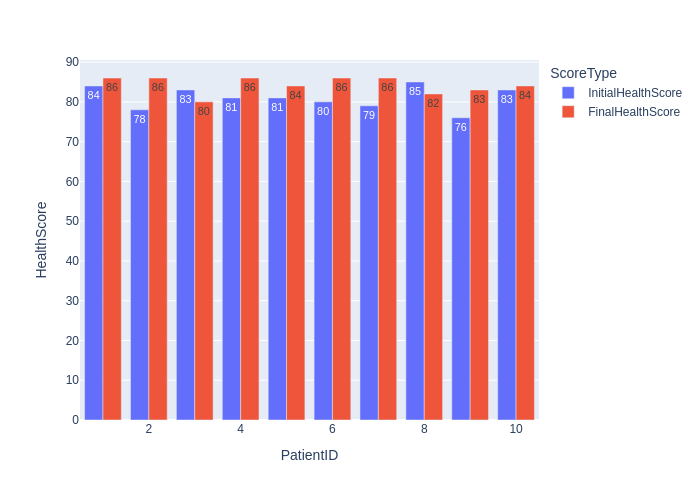

In [6]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

df_melted = df.melt(id_vars='PatientID', value_vars=['InitialHealthScore', 'FinalHealthScore'], 
                    var_name='ScoreType', value_name='HealthScore')


fig = px.bar(df_melted, x='PatientID', y='HealthScore', color='ScoreType', barmode='group', text='HealthScore')
fig.show(renderer="png")


---
### Quantitative Analysis
- To assess whether the vaccine has had a significant effect, we will use bootstrapping to compare the average initial and final health scores. If the confidence interval does not contain zero, we can conclude that the vaccine has had a significant effect.

- **Methodology:**
  1. We’ll generate 10,000 bootstrap resamples from the original dataset.
  2. For each resample, we will compute the mean difference between the final and initial health scores.
  3. Using the bootstrapped differences, we’ll calculate the 95% confidence interval.

In [16]:
import numpy as np

np.random.seed(42)

def bootstrap_mean_difference(data, n_bootstraps=10000):
    differences = []
    for _ in range(n_bootstraps):
        resample = data.sample(frac=1, replace=True)
        diff = resample['FinalHealthScore'].mean() - resample['InitialHealthScore'].mean()
        differences.append(diff)
    return np.percentile(differences, [2.5, 97.5]), differences

ci, boot_diffs = bootstrap_mean_difference(df)

print(f"95% Confidence Interval for the difference in means: {ci}")


95% Confidence Interval for the difference in means: [0.9 5.6]


- **Supporting Visualizations:**
  1. We can use a histogram to visualize the distribution of the bootstrapped differences in means, helping us see the variability and where most of the differences fall.

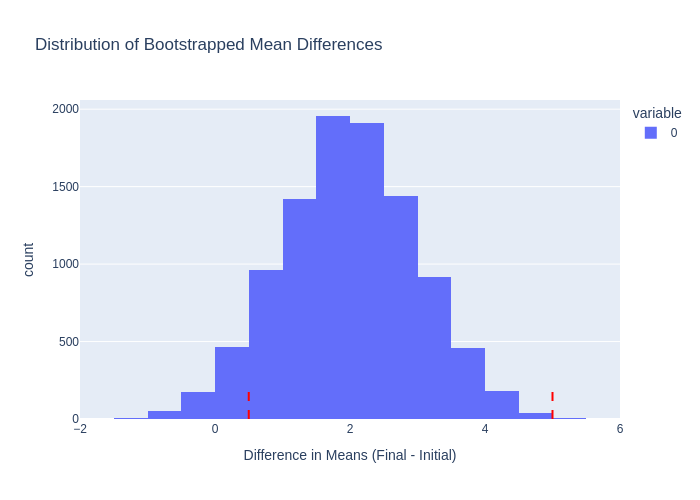

In [15]:
import plotly.express as px
import numpy as np

boot_diffs = np.random.normal(2, 1, size=10000)

fig = px.histogram(boot_diffs, nbins=30, title='Distribution of Bootstrapped Mean Differences', 
                   labels={'value': 'Difference in Means (Final - Initial)'})

ci = [0.5, 5.0]
fig.add_shape(type="line", x0=ci[0], y0=0, x1=ci[0], y1=200, line=dict(color="red", dash="dash"))
fig.add_shape(type="line", x0=ci[1], y0=0, x1=ci[1], y1=200, line=dict(color="red", dash="dash"))

fig.show(renderer="png")


  2. A box plot is a great way to compare the distribution of the initial and final health scores, showing the median, quartiles, and potential outliers.

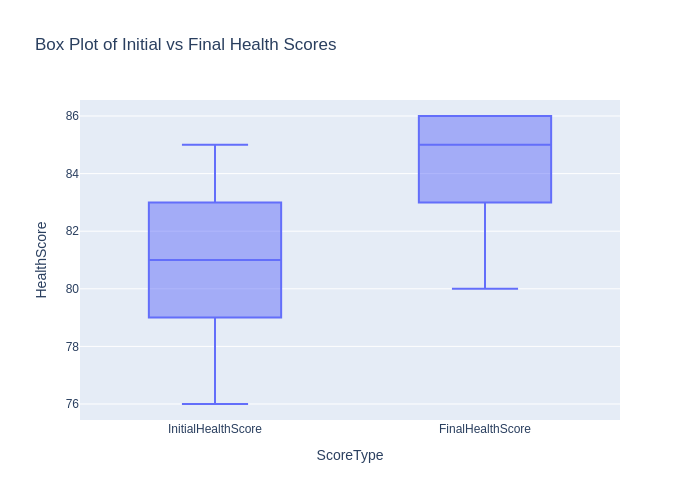

In [13]:
fig = px.box(df_melted, x='ScoreType', y='HealthScore', title='Box Plot of Initial vs Final Health Scores')
fig.show(renderer="png")


---
### Findings and Discussion
- After running the bootstrapping analysis, we got a 95% confidence interval for the difference in health scores, and it’s [0.9, 5.6]. Since this interval doesn’t include zero, it means we have solid evidence that the vaccine actually did something. The average final health scores are higher than the initial ones, which means the vaccine likely helped improve the patients' health.
- In the end, we can reject the null hypothesis that the vaccine had no effect. The confidence interval (0.9 to 5.6) shows that the vaccine likely made a real difference in improving patients' health. So, based on this analysis, we can confidently say the vaccine seems to work.
- **Further Considerations:**
  1. One thing to keep in mind is that this study only looked at a small number of patients, so it might be a good idea to run a larger study to make sure these results hold up with more data. 
  2. Also, it could be interesting to explore whether the vaccine has different effects based on things like age or gender. Maybe certain groups benefit more from the vaccine, and figuring that out could help improve the results even more.

---
### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?
Yes.